In [1]:
import pandas as pd 
import numpy as np 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Mohammad asif/Downloads/py_demo_client_extension_30_20250221075805.csv", skiprows =4)

In [3]:
df.head(5)

,Browsing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime
1,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21T07:58:02.688Z,link,NaN,166328,0,2025-02-20T23:58:02-08:00
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21T07:57:51.308Z,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20T23:57:51-08:00
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.972Z,link,PY Insights | Product,166319,0,2025-02-20T23:57:40-08:00
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.988Z,link,PY Insights | Product,166321,0,2025-02-20T23:57:40-08:00


In [4]:
df.columns=df.iloc[0]

In [5]:
df = df[1:]

In [6]:
df.head()

,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime
1,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21T07:58:02.688Z,link,NaN,166328,0,2025-02-20T23:58:02-08:00
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21T07:57:51.308Z,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20T23:57:51-08:00
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.972Z,link,PY Insights | Product,166319,0,2025-02-20T23:57:40-08:00
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21T07:57:40.988Z,link,PY Insights | Product,166321,0,2025-02-20T23:57:40-08:00
5,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,2025-02-21T07:57:38.017Z,link,PY Insights | Product,166318,0,2025-02-20T23:57:38-08:00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104 entries, 1 to 5104
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OrgId             5104 non-null   object
 1   ParticipantId     5104 non-null   object
 2   DeviceId          5104 non-null   object
 3   url               5104 non-null   object
 4   eventtimeutc      5104 non-null   object
 5   transition        5104 non-null   object
 6   title             5051 non-null   object
 7   visitId           5104 non-null   object
 8   referringVisitId  5104 non-null   object
 9   eventtime         5104 non-null   object
dtypes: object(10)
memory usage: 398.9+ KB


In [8]:
df.isnull().sum()

0
OrgId                0
ParticipantId        0
DeviceId             0
url                  0
eventtimeutc         0
transition           0
title               53
visitId              0
referringVisitId     0
eventtime            0
dtype: int64

In [9]:
#fill the null value with unknow
df['title'] = df['title'].fillna("Unkown")

In [10]:
# Convert timestamps to datetime format
df["eventtimeutc"] = pd.to_datetime(df["eventtimeutc"], errors='coerce', utc=True)
df["eventtime"] = pd.to_datetime(df["eventtime"], errors='coerce')

In [11]:
# Extract Day of Week days
df['Day'] = df['eventtimeutc'].dt.day_name() 

In [12]:
# Extract Hour
df['Hour'] = df['eventtimeutc'].dt.hour

In [13]:
#extract date
df["Date"] = df["eventtimeutc"].dt.date

In [14]:
# Extract domain from URL
df["Domain"] = df["url"].str.extract(r"https?://([^/]+)/")

In [17]:
df["Domain"].value_counts()

Domain
www.google.com                  1328
www.upwork.com                   473
mail.google.com                  149
pyinsightscom.sharepoint.com     140
www.loopnet.com                  133
                                ... 
leadxpro.com                       1
blog.google                        1
www.samsung.com                    1
centrip-japan.com                  1
chromewebstore.google.com          1
Name: count, Length: 409, dtype: int64

In [15]:
df

,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime,Day,Hour,Date,Domain
1,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21 07:58:02.688000+00:00,link,Unkown,166328,0,2025-02-20 23:58:02-08:00,Friday,7,2025-02-21,NaN
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21 07:57:51.308000+00:00,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20 23:57:51-08:00,Friday,7,2025-02-21,chromewebstore.google.com
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21 07:57:40.972000+00:00,link,PY Insights | Product,166319,0,2025-02-20 23:57:40-08:00,Friday,7,2025-02-21,py-insights.com
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21 07:57:40.988000+00:00,link,PY Insights | Product,166321,0,2025-02-20 23:57:40-08:00,Friday,7,2025-02-21,py-insights.com
5,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,2025-02-21 07:57:38.017000+00:00,link,PY Insights | Product,166318,0,2025-02-20 23:57:38-08:00,Friday,7,2025-02-21,py-insights.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,py_demo_client,demo,2nwjevbvxzm7ehb254,https://accounts.britishairways.com/security/c...,2025-01-21 11:01:22.350000+00:00,typed,Error,160220,0,2025-01-21 03:01:22-08:00,Tuesday,11,2025-01-21,accounts.britishairways.com
5101,py_demo_client,demo,2nwjevbvxzm7ehb254,https://accounts.britishairways.com/u/login?st...,2025-01-21 11:00:39.407000+00:00,link,British Airways log in,160213,160212,2025-01-21 03:00:39-08:00,Tuesday,11,2025-01-21,accounts.britishairways.com
5102,py_demo_client,demo,2nwjevbvxzm7ehb254,https://www.avios.com/manage-avios/move-and-co...,2025-01-21 11:00:37.059000+00:00,link,Convert Avios: Nectar &#44; Finnair Plus &#44...,160211,0,2025-01-21 03:00:37-08:00,Tuesday,11,2025-01-21,www.avios.com
5103,py_demo_client,demo,2nwjevbvxzm7ehb254,https://www.avios.com/manage-avios/move-and-co...,2025-01-21 11:00:35.229000+00:00,typed,Convert Avios: Nectar &#44; Finnair Plus &#44...,160209,0,2025-01-21 03:00:35-08:00,Tuesday,11,2025-01-21,www.avios.com


In [19]:
# Top 10 most visited domains
top_domains = df["Domain"].value_counts().head(10)
print("Top 10 Most Visited Domains:")
print(top_domains)

Top 10 Most Visited Domains:
Domain
www.google.com                      1328
www.upwork.com                       473
mail.google.com                      149
pyinsightscom.sharepoint.com         140
www.loopnet.com                      133
eu-west-1.console.aws.amazon.com     128
www.amazon.in                        123
wellfound.com                        107
www.zipair.net                       106
www.facebook.com                     104
Name: count, dtype: int64


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


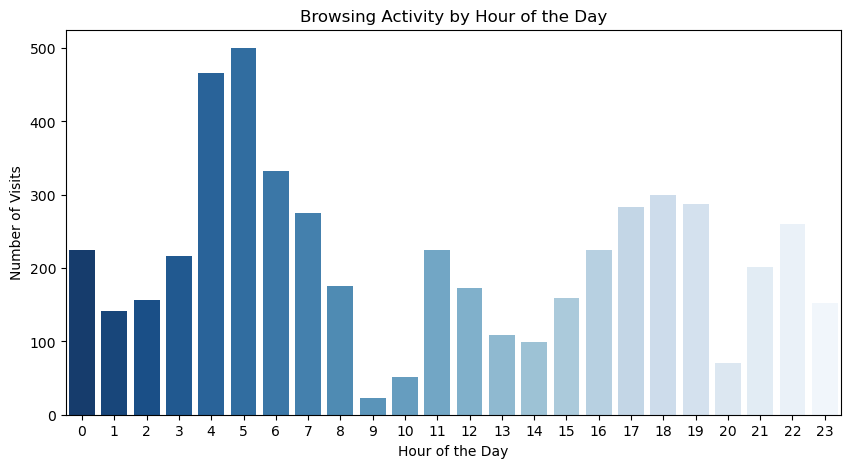

In [22]:
# Plot browsing activity by hour
plt.figure(figsize=(10, 5))
hourly_activity = df["Hour"].value_counts().sort_index()
sns.barplot(x=hourly_activity.index, y=hourly_activity.values, palette="Blues_r")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Visits")
plt.title("Browsing Activity by Hour of the Day")
plt.xticks(range(0, 24))
plt.show()


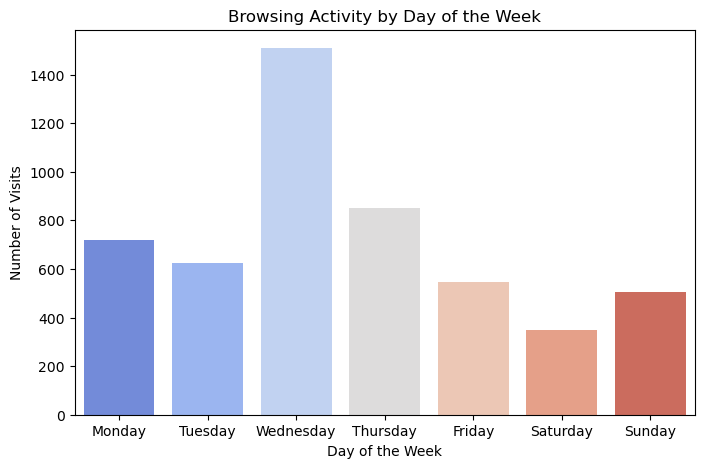

In [24]:
# Plot browsing activity by day of the week
plt.figure(figsize=(8, 5))
day_activity = df["Day"].value_counts()[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]]
sns.barplot(x=day_activity.index, y=day_activity.values, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Visits")
plt.title("Browsing Activity by Day of the Week")
plt.show()

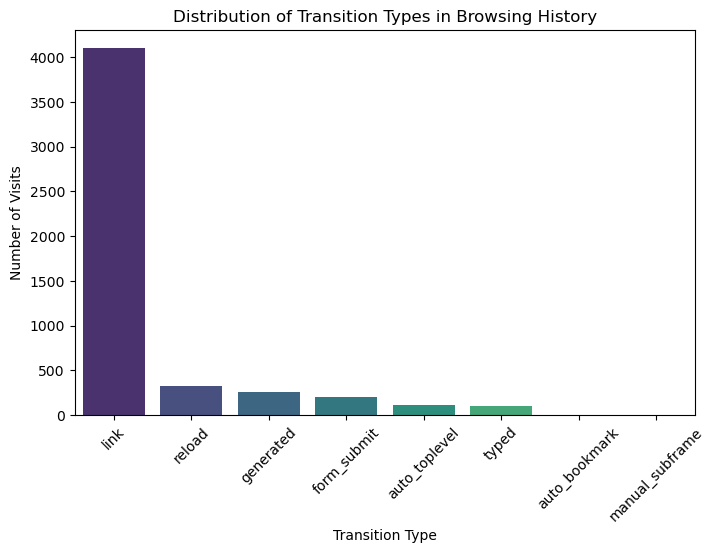

In [26]:
# Transition type analysis
transition_counts = df["transition"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=transition_counts.index, y=transition_counts.values, palette="viridis")
plt.xlabel("Transition Type")
plt.ylabel("Number of Visits")
plt.title("Distribution of Transition Types in Browsing History")
plt.xticks(rotation=45)
plt.show()

In [16]:
df.to_csv("cleaned1_py_task.csv",index=False)